In [ ]:
# import

import sys
import os
import torch
import numpy as np
from tqdm import tqdm
import torch.nn as nn
import pandas as pd
import torch.nn.functional as F
from torch.autograd import Variable
import torch.utils.data as Data
import matplotlib.pyplot as plt
from torch.optim import Adam, SGD
from sklearn.metrics import confusion_matrix
from keras.layers import Dense, Conv1D, MaxPool1D, Flatten, Dropout
from keras.layers import Input, LSTM, RepeatVector, TimeDistributed
from keras.models import Model
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import BatchNormalization
import keras
from matplotlib.pyplot import figure
from keras.callbacks import EarlyStopping, ModelCheckpoint
import scipy.io as sio

from tensorflow.keras import Sequential
from tensorflow.keras.utils import plot_model



In [ ]:
# mount to google drive

from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [ ]:
data_path = '/gdrive/My Drive/Mat Files/'
print('Available data', os.listdir(data_path))
print('Number of files', len(os.listdir(data_path)))

Available data ['part_1.mat', 'part_10.mat', 'part_11.mat', 'part_12.mat', 'part_2.mat', 'part_3.mat', 'part_4.mat', 'part_5.mat', 'part_6.mat', 'part_7.mat', 'part_8.mat', 'part_9.mat']
Number of files 12


In [ ]:
mat1 = sio.loadmat('/gdrive/My Drive/Mat Files/part_1.mat')['p'][0]
mat2 = sio.loadmat('/gdrive/My Drive/Mat Files/part_2.mat')['p'][0]
mat3 = sio.loadmat('/gdrive/My Drive/Mat Files/part_3.mat')['p'][0]
mat4 = sio.loadmat('/gdrive/My Drive/Mat Files/part_4.mat')['p'][0]
mat5 = sio.loadmat('/gdrive/My Drive/Mat Files/part_5.mat')['p'][0]
mat6 = sio.loadmat('/gdrive/My Drive/Mat Files/part_6.mat')['p'][0]
mat7 = sio.loadmat('/gdrive/My Drive/Mat Files/part_7.mat')['p'][0]
mat8 = sio.loadmat('/gdrive/My Drive/Mat Files/part_8.mat')['p'][0]
mat9 = sio.loadmat('/gdrive/My Drive/Mat Files/part_9.mat')['p'][0]
mat10 = sio.loadmat('/gdrive/My Drive/Mat Files/part_10.mat')['p'][0]
mat11 = sio.loadmat('/gdrive/My Drive/Mat Files/part_11.mat')['p'][0]
mat12 = sio.loadmat('/gdrive/My Drive/Mat Files/part_12.mat')['p'][0]

In [ ]:
data = np.concatenate((mat1, mat2, mat3, mat4, mat5, mat6, mat7, mat8, mat9, mat10, mat11, mat12))

In [ ]:
del mat1
del mat2
del mat3
del mat4
del mat5
del mat6
del mat7
del mat8
del mat9
del mat10
del mat11
del mat12

In [ ]:
print(f"Total Samples: {len(data)}")

Total Samples: 12000


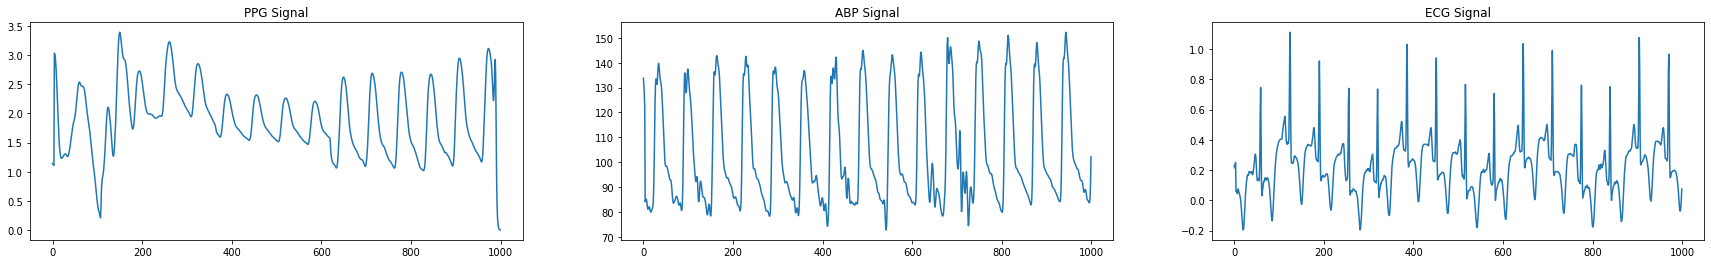

In [ ]:
plt.subplot(1, 3, 1)
plt.plot(data[10][0])
plt.title('PPG Signal')

plt.subplot(1, 3, 2)
plt.plot(data[10][1])
plt.title('ABP Signal')

plt.subplot(1, 3, 3)
plt.plot(data[10][2])
plt.title('ECG Signal')

plt.subplots_adjust(right=4)

In [ ]:
ppg = []
abp = []
ecg = []

for sample in data:
  ppg.append(sample[0][:1000])
  abp.append(sample[1][:1000])
  ecg.append(sample[2][:1000])

pd.DataFrame(ppg).to_csv('/gdrive/My Drive/ppg.csv', index_label=False)
pd.DataFrame(abp).to_csv('/gdrive/My Drive/abp.csv', index_label=False)
pd.DataFrame(ecg).to_csv('/gdrive/My Drive/ecg.csv', index_label=False)

In [ ]:
ppg = pd.read_csv('/gdrive/My Drive/CSV_Folder/ppg.csv')
abp = pd.read_csv('/gdrive/My Drive/CSV_Folder/abp.csv')
ecg = pd.read_csv('/gdrive/My Drive/CSV_Folder/ecg.csv')

In [ ]:
abp = np.divide(np.subtract(abp, 50), 150)

In [ ]:
data = np.stack((ppg, ecg), axis=-1)
X_train = data[:9600]
X_val = data[9600:10800]
X_test = data[10800:]

y_train = abp[:9600]
y_val = abp[9600:10800]
y_test = abp[10800:]

In [ ]:
inputs = Input(shape=(1000, 2))
# dense = Dense(128)(inputs)
encoder = LSTM(128, return_sequences=False)(inputs)
encoding_repeat = RepeatVector(1000)(encoder)
decoder = LSTM(128, return_sequences=True)(encoding_repeat)
sequence_prediction = TimeDistributed(Dense(1, activation='linear'))(decoder)
model = Model(inputs, sequence_prediction)
model.compile('adam', 'mse')
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val,y_val))


Epoch 1/10
150/150 [==============================] - 52s 323ms/step - loss: 0.0301 - val_loss: 0.0341
Epoch 2/10
150/150 [==============================] - 47s 316ms/step - loss: 0.0282 - val_loss: 0.0349
Epoch 3/10
150/150 [==============================] - 47s 315ms/step - loss: 0.0281 - val_loss: 0.0353
Epoch 4/10
150/150 [==============================] - 48s 322ms/step - loss: 0.0281 - val_loss: 0.0352
Epoch 5/10
150/150 [==============================] - 48s 320ms/step - loss: 0.0281 - val_loss: 0.0334
Epoch 6/10
150/150 [==============================] - 48s 319ms/step - loss: 0.0280 - val_loss: 0.0341
Epoch 7/10
150/150 [==============================] - 47s 316ms/step - loss: 0.0281 - val_loss: 0.0335
Epoch 8/10
150/150 [==============================] - 48s 317ms/step - loss: 0.0280 - val_loss: 0.0331
Epoch 9/10
150/150 [==============================] - 48s 317ms/step - loss: 0.0280 - val_loss: 0.0355
Epoch 10/10
150/150 [==============================] - 47s 316ms/step - l

38/38 [==============================] - 5s 120ms/step - loss: 0.0295


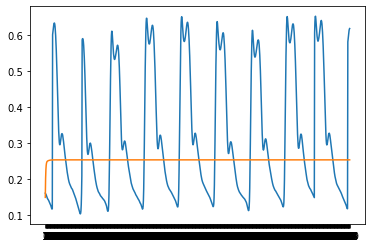

In [ ]:
model.evaluate((X_test),y_test)
prediction = model.predict(X_test)

plt.plot(y_test.iloc[10])
plt.plot(prediction[10])

In [ ]:
inputs = Input(shape=(1000, 2))
# dense = Dense(128)(inputs) #64, 128
encoder = LSTM(256, return_sequences=False)(inputs) #128, 256, 512
do = Dropout(0.1)(encoder)
bn = BatchNormalization()(do)
dense_2 = Dense(1000)(bn)
model = Model(inputs, dense_2)
model.compile('adam', 'mse')
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val,y_val))

Epoch 1/10
150/150 [==============================] - 40s 254ms/step - loss: 0.0510 - val_loss: 0.0341
Epoch 2/10
150/150 [==============================] - 37s 249ms/step - loss: 0.0286 - val_loss: 0.0352
Epoch 3/10
150/150 [==============================] - 37s 249ms/step - loss: 0.0282 - val_loss: 0.0332
Epoch 4/10
150/150 [==============================] - 37s 250ms/step - loss: 0.0279 - val_loss: 0.0336
Epoch 5/10
150/150 [==============================] - 37s 250ms/step - loss: 0.0277 - val_loss: 0.0356
Epoch 6/10
150/150 [==============================] - 37s 250ms/step - loss: 0.0275 - val_loss: 0.0347
Epoch 7/10
150/150 [==============================] - 38s 250ms/step - loss: 0.0273 - val_loss: 0.0339
Epoch 8/10
150/150 [==============================] - 37s 250ms/step - loss: 0.0270 - val_loss: 0.0346
Epoch 9/10
150/150 [==============================] - 37s 250ms/step - loss: 0.0269 - val_loss: 0.0335
Epoch 10/10
150/150 [==============================] - 37s 249ms/step - l

38/38 [==============================] - 3s 76ms/step - loss: 0.0292


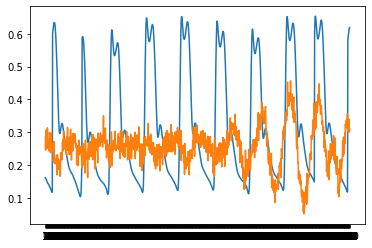

In [ ]:
model.evaluate((X_test),y_test)
prediction = model.predict(X_test)

plt.plot(y_test.iloc[10])
plt.plot(prediction[10])

In [ ]:
inputs = Input(shape=(1000, 2))
encoder = LSTM(512, return_sequences=False)(inputs) #128, 256, 512
do = Dropout(0.1)(encoder)
bn = BatchNormalization()(do)
dense_2 = Dense(1000)(bn)
model = Model(inputs, dense_2)
model.compile('adam', 'mse')
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val,y_val))

Epoch 1/10
150/150 [==============================] - 74s 481ms/step - loss: 0.0481 - val_loss: 0.0344
Epoch 2/10
150/150 [==============================] - 71s 477ms/step - loss: 0.0285 - val_loss: 0.0347
Epoch 3/10
150/150 [==============================] - 72s 481ms/step - loss: 0.0282 - val_loss: 0.0350
Epoch 4/10
150/150 [==============================] - 71s 475ms/step - loss: 0.0281 - val_loss: 0.0340
Epoch 5/10
150/150 [==============================] - 71s 477ms/step - loss: 0.0280 - val_loss: 0.0349
Epoch 6/10
150/150 [==============================] - 74s 494ms/step - loss: 0.0279 - val_loss: 0.0346
Epoch 7/10
150/150 [==============================] - 72s 478ms/step - loss: 0.0276 - val_loss: 0.0342
Epoch 8/10
150/150 [==============================] - 71s 474ms/step - loss: 0.0277 - val_loss: 0.0343
Epoch 9/10
150/150 [==============================] - 71s 472ms/step - loss: 0.0279 - val_loss: 0.0347
Epoch 10/10
150/150 [==============================] - 71s 474ms/step - l

38/38 [==============================] - 6s 144ms/step - loss: 0.0296


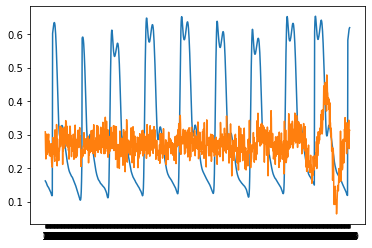

In [ ]:
model.evaluate((X_test),y_test)
prediction = model.predict(X_test)

plt.plot(y_test.iloc[10])
plt.plot(prediction[10])

In [ ]:
model = Sequential()

model.add(Input(shape=(1000, 2)))
model.add(Dense(128))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(Dense(256))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(Dense(512))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(Dense(256))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(Dense(128))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(Dense(1, activation='linear'))
model.compile('adam', 'huber')
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val,y_val))

Epoch 1/10
150/150 [==============================] - 32s 203ms/step - loss: 0.1447 - val_loss: 0.0169
Epoch 2/10
150/150 [==============================] - 30s 200ms/step - loss: 0.0689 - val_loss: 0.0172
Epoch 3/10
150/150 [==============================] - 30s 201ms/step - loss: 0.0470 - val_loss: 0.0167
Epoch 4/10
150/150 [==============================] - 30s 201ms/step - loss: 0.0321 - val_loss: 0.0166
Epoch 5/10
150/150 [==============================] - 30s 201ms/step - loss: 0.0232 - val_loss: 0.0167
Epoch 6/10
150/150 [==============================] - 30s 201ms/step - loss: 0.0183 - val_loss: 0.0166
Epoch 7/10
150/150 [==============================] - 30s 201ms/step - loss: 0.0159 - val_loss: 0.0169
Epoch 8/10
150/150 [==============================] - 30s 201ms/step - loss: 0.0147 - val_loss: 0.0167
Epoch 9/10
150/150 [==============================] - 30s 200ms/step - loss: 0.0142 - val_loss: 0.0167
Epoch 10/10
150/150 [==============================] - 30s 201ms/step - l

38/38 [==============================] - 1s 27ms/step - loss: 0.0139


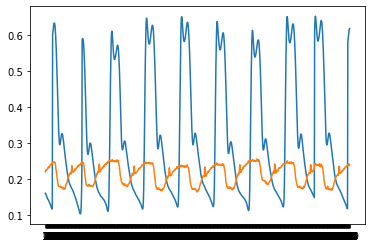

In [ ]:
model.evaluate((X_test),y_test)
prediction = model.predict(X_test)

plt.plot(y_test.iloc[10])
plt.plot(prediction[10])

In [ ]:
model = Sequential()

model.add(Input(shape=(1000, 2)))
model.add(Dense(128))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(Dense(256))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(Dense(512))
model.add(Dense(1, activation='linear'))
model.compile('adam', 'mse')

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 1000, 128)         384       
                                                                 
 dropout_6 (Dropout)         (None, 1000, 128)         0         
                                                                 
 batch_normalization_6 (Batc  (None, 1000, 128)        512       
 hNormalization)                                                 
                                                                 
 dense_10 (Dense)            (None, 1000, 256)         33024     
                                                                 
 dropout_7 (Dropout)         (None, 1000, 256)         0         
                                                                 
 batch_normalization_7 (Batc  (None, 1000, 256)        1024      
 hNormalization)                                      

In [ ]:
model = Sequential()

model.add(Input(shape=(1000, 2)))
model.add(Dense(128))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(Dense(256))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(Dense(512))
model.add(Dense(1, activation='linear'))
model.compile('adam', 'mse')
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val,y_val))

Epoch 1/10
150/150 [==============================] - 16s 89ms/step - loss: 0.3405 - val_loss: 0.0336
Epoch 2/10
150/150 [==============================] - 13s 85ms/step - loss: 0.0289 - val_loss: 0.0329
Epoch 3/10
150/150 [==============================] - 13s 85ms/step - loss: 0.0284 - val_loss: 0.0338
Epoch 4/10
150/150 [==============================] - 13s 86ms/step - loss: 0.0288 - val_loss: 0.0382
Epoch 5/10
150/150 [==============================] - 13s 86ms/step - loss: 0.0289 - val_loss: 0.0318
Epoch 6/10
150/150 [==============================] - 13s 86ms/step - loss: 0.0292 - val_loss: 0.0350
Epoch 7/10
150/150 [==============================] - 13s 87ms/step - loss: 0.0296 - val_loss: 0.0332
Epoch 8/10
150/150 [==============================] - 13s 86ms/step - loss: 0.0293 - val_loss: 0.0356
Epoch 9/10
150/150 [==============================] - 13s 87ms/step - loss: 0.0288 - val_loss: 0.0342
Epoch 10/10
150/150 [==============================] - 13s 86ms/step - loss: 0.029

38/38 [==============================] - 1s 19ms/step - loss: 0.0299


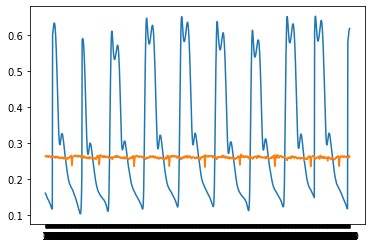

In [ ]:
model.evaluate((X_test),y_test)
prediction = model.predict(X_test)

plt.plot(y_test.iloc[10])
plt.plot(prediction[10])

In [ ]:
inputs = Input(shape=(1000, 2))
encoder = LSTM(256, return_sequences=False)(inputs)
do = Dropout(0.1)(encoder)
bn = BatchNormalization()(do)
dense = Dense(1000)(bn)
model = Model(inputs, dense)
model.compile('adam', 'mse')
model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_val,y_val))

In [ ]:
model.evaluate((X_test),y_test)
prediction = model.predict(X_test)

plt.plot(y_test.iloc[10])
plt.plot(prediction[10])

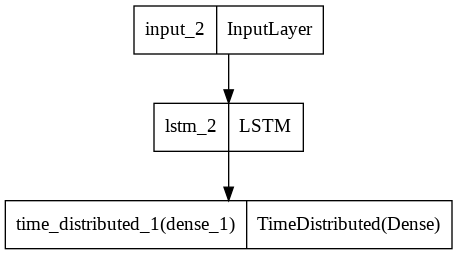

In [ ]:
inputs = Input(shape=(1000, 2))
encoder = LSTM(128, return_sequences=True)(inputs)
sequence_prediction = TimeDistributed(Dense(1, activation='linear'))(encoder)
model = Model(inputs, sequence_prediction)

plot_model(model)

In [ ]:
inputs = Input(shape=(1000, 2))
encoder = LSTM(128, return_sequences=True)(inputs)
sequence_prediction = TimeDistributed(Dense(1, activation='linear'))(encoder)
model = Model(inputs, sequence_prediction)
model.compile('adam', 'mse')
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val,y_val))

Epoch 1/10
150/150 [==============================] - 31s 167ms/step - loss: 0.0319 - val_loss: 0.0363
Epoch 2/10
150/150 [==============================] - 24s 162ms/step - loss: 0.0262 - val_loss: 0.0329
Epoch 3/10
150/150 [==============================] - 24s 162ms/step - loss: 0.0249 - val_loss: 0.0300
Epoch 4/10
150/150 [==============================] - 24s 162ms/step - loss: 0.0237 - val_loss: 0.0285
Epoch 5/10
150/150 [==============================] - 24s 162ms/step - loss: 0.0231 - val_loss: 0.0278
Epoch 6/10
150/150 [==============================] - 24s 160ms/step - loss: 0.0213 - val_loss: 0.0261
Epoch 7/10
150/150 [==============================] - 24s 160ms/step - loss: 0.0196 - val_loss: 0.0233
Epoch 8/10
150/150 [==============================] - 24s 161ms/step - loss: 0.0183 - val_loss: 0.0217
Epoch 9/10
150/150 [==============================] - 24s 162ms/step - loss: 0.0162 - val_loss: 0.0199
Epoch 10/10
150/150 [==============================] - 24s 161ms/step - l

38/38 [==============================] - 3s 70ms/step - loss: 0.0182


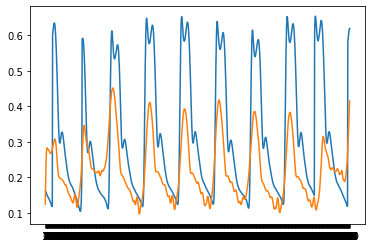

In [ ]:
model.evaluate((X_test),y_test)
prediction = model.predict(X_test)

plt.plot(y_test.iloc[10])
plt.plot(prediction[10])


In [ ]:
inputs = Input(shape=(1000, 2))
encoder = LSTM(256, return_sequences=True)(inputs)
sequence_prediction = TimeDistributed(Dense(1, activation='linear'))(encoder)
model = Model(inputs, sequence_prediction)
model.compile('adam', 'mse')
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val,y_val))

Epoch 1/10
150/150 [==============================] - 43s 263ms/step - loss: 0.0297 - val_loss: 0.0314
Epoch 2/10
150/150 [==============================] - 38s 256ms/step - loss: 0.0253 - val_loss: 0.0366
Epoch 3/10
150/150 [==============================] - 38s 254ms/step - loss: 0.0241 - val_loss: 0.0314
Epoch 4/10
150/150 [==============================] - 38s 254ms/step - loss: 0.0204 - val_loss: 0.0225
Epoch 5/10
150/150 [==============================] - 39s 263ms/step - loss: 0.0164 - val_loss: 0.0191
Epoch 6/10
150/150 [==============================] - 38s 254ms/step - loss: 0.0157 - val_loss: 0.0209
Epoch 7/10
150/150 [==============================] - 38s 254ms/step - loss: 0.0154 - val_loss: 0.0227
Epoch 8/10
150/150 [==============================] - 38s 255ms/step - loss: 0.0150 - val_loss: 0.0209
Epoch 9/10
150/150 [==============================] - 38s 254ms/step - loss: 0.0149 - val_loss: 0.0204
Epoch 10/10
150/150 [==============================] - 38s 254ms/step - l

38/38 [==============================] - 3s 80ms/step - loss: 0.0169


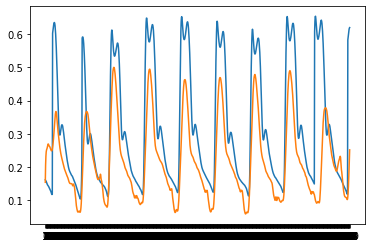

In [ ]:
model.evaluate((X_test),y_test)
prediction = model.predict(X_test)

plt.plot(y_test.iloc[10])
plt.plot(prediction[10])

In [ ]:
inputs = Input(shape=(1000, 2))
encoder = LSTM(512, return_sequences=True)(inputs)
sequence_prediction = TimeDistributed(Dense(1, activation='linear'))(encoder)
model = Model(inputs, sequence_prediction)
model.compile('adam', 'mse')
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val,y_val))

Epoch 1/10
150/150 [==============================] - 78s 507ms/step - loss: 0.0340 - val_loss: 0.0311
Epoch 2/10
150/150 [==============================] - 77s 516ms/step - loss: 0.0264 - val_loss: 0.0318
Epoch 3/10
150/150 [==============================] - 75s 502ms/step - loss: 0.0253 - val_loss: 0.0320
Epoch 4/10
150/150 [==============================] - 75s 502ms/step - loss: 0.0235 - val_loss: 0.0268
Epoch 5/10
150/150 [==============================] - 75s 503ms/step - loss: 0.0185 - val_loss: 0.0252
Epoch 6/10
150/150 [==============================] - 75s 501ms/step - loss: 0.0160 - val_loss: 0.0199
Epoch 7/10
150/150 [==============================] - 75s 502ms/step - loss: 0.0155 - val_loss: 0.0202
Epoch 8/10
150/150 [==============================] - 75s 503ms/step - loss: 0.0154 - val_loss: 0.0221
Epoch 9/10
150/150 [==============================] - 75s 502ms/step - loss: 0.0150 - val_loss: 0.0190
Epoch 10/10
150/150 [==============================] - 75s 501ms/step - l

38/38 [==============================] - 6s 144ms/step - loss: 0.0177


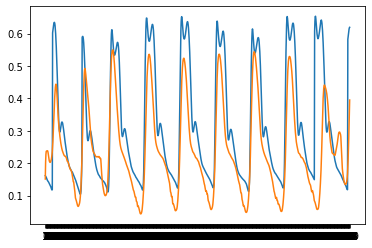

In [ ]:
model.evaluate((X_test),y_test)
prediction = model.predict(X_test)

plt.plot(y_test.iloc[10])
plt.plot(prediction[10])